In [1]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Download latest version
path = kagglehub.dataset_download("ahsan81/hotel-reservations-classification-dataset")

print("Path to dataset files:", path)
csv_file = os.path.join(path, 'Hotel Reservations.csv')
df = pd.read_csv(csv_file)
#Mapeo Booking_status
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
df.head()

Path to dataset files: C:\Users\samue\.cache\kagglehub\datasets\ahsan81\hotel-reservations-classification-dataset\versions\1


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [49]:
# Configuración visual
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)


Porcentaje de reservas canceladas: 32.76%
Porcentaje de reservas no canceladas: 67.24%


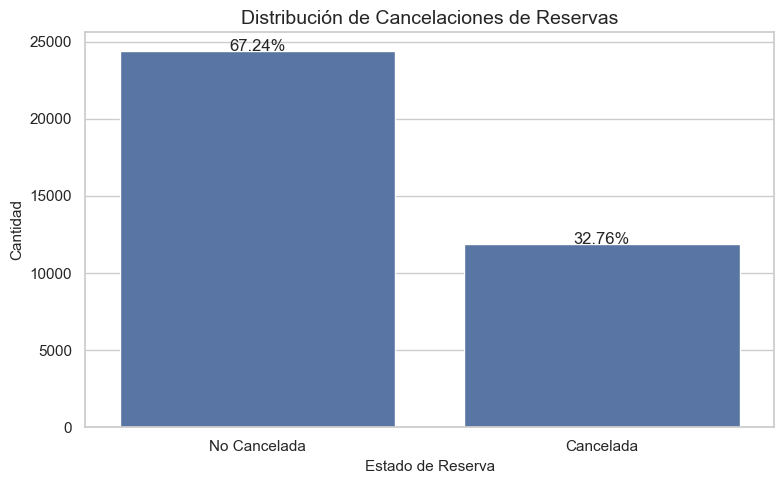

In [50]:
# Confirmando el desbalance en la variable objetivo
plt.figure(figsize=(8, 5))  # Reducido de (10, 6)
ax = sns.countplot(x='booking_status', data=df)
plt.title('Distribución de Cancelaciones de Reservas', fontsize=14)
plt.xlabel('Estado de Reserva', fontsize=11)
plt.ylabel('Cantidad', fontsize=11)
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'])

# Añadir porcentajes sobre las barras
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = round((height / total) * 100, 2)
    ax.text(p.get_x() + p.get_width()/2., height + 30, f'{percentage}%', ha="center")

# Cuantificar el desbalance
canceled = df['booking_status'].mean() * 100
not_canceled = (1 - df['booking_status'].mean()) * 100
print(f"Porcentaje de reservas canceladas: {canceled:.2f}%")
print(f"Porcentaje de reservas no canceladas: {not_canceled:.2f}%")
plt.tight_layout()
plt.show()

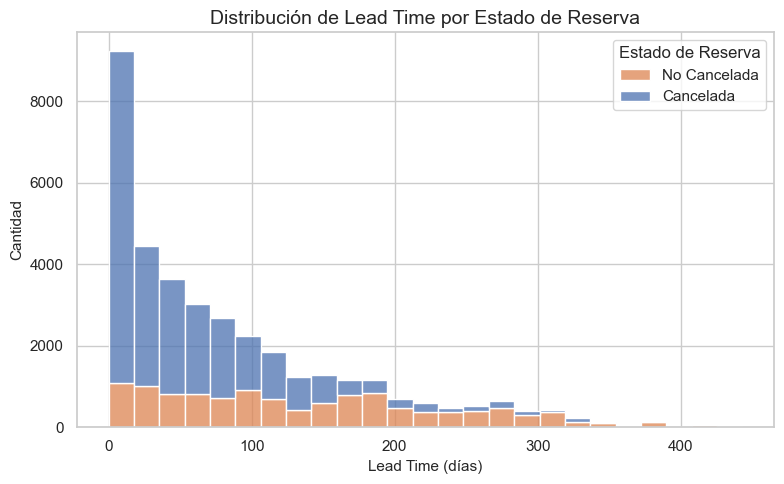

                  count        mean        std  min   25%    50%    75%    max
booking_status                                                                
0               24390.0   58.927224  64.028714  0.0  10.0   39.0   86.0  386.0
1               11885.0  139.215482  98.947731  0.0  55.0  122.0  205.0  443.0


In [51]:
# Análisis de lead_time (tiempo entre la reserva y la llegada)
plt.figure(figsize=(8, 5))  # Reducido de (12, 6)
sns.histplot(data=df, x='lead_time', hue='booking_status', multiple='stack', bins=25)
plt.title('Distribución de Lead Time por Estado de Reserva', fontsize=14)
plt.xlabel('Lead Time (días)', fontsize=11)
plt.ylabel('Cantidad', fontsize=11)
plt.legend(title='Estado de Reserva', labels=['No Cancelada', 'Cancelada'])
plt.tight_layout()
plt.show()

# Estadísticas de lead_time por estado de reserva
print(df.groupby('booking_status')['lead_time'].describe())

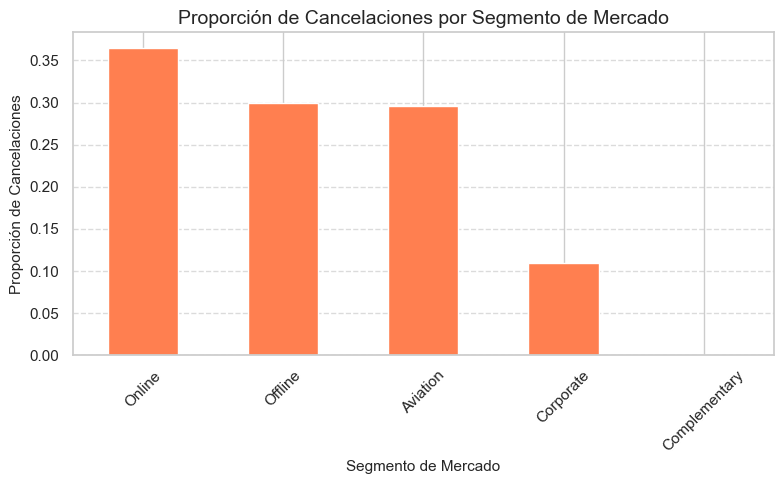

booking_status       No Cancelada  Cancelada  Total  % Cancelada
market_segment_type                                             
Online                      14739       8475  23214    36.508142
Offline                      7375       3153  10528    29.948708
Aviation                       88         37    125    29.600000
Corporate                    1797        220   2017    10.907288
Complementary                 391          0    391     0.000000


In [52]:
# Análisis del segmento de mercado
plt.figure(figsize=(8, 5))  # Reducido de (12, 6)
# Calcular las proporciones de cancelación por segmento de mercado
segment_cancel_prop = pd.crosstab(df['market_segment_type'], df['booking_status'], normalize='index')
segment_cancel_prop.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)

# Graficar
segment_cancel_prop['Cancelada'].sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Proporción de Cancelaciones por Segmento de Mercado', fontsize=14)
plt.xlabel('Segmento de Mercado', fontsize=11)
plt.ylabel('Proporción de Cancelaciones', fontsize=11)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar tabla con cantidades y porcentajes
segment_counts = pd.crosstab(df['market_segment_type'], df['booking_status'])
segment_counts.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
segment_counts['Total'] = segment_counts.sum(axis=1)
segment_counts['% Cancelada'] = segment_counts['Cancelada'] / segment_counts['Total'] * 100
print(segment_counts.sort_values(by='% Cancelada', ascending=False))

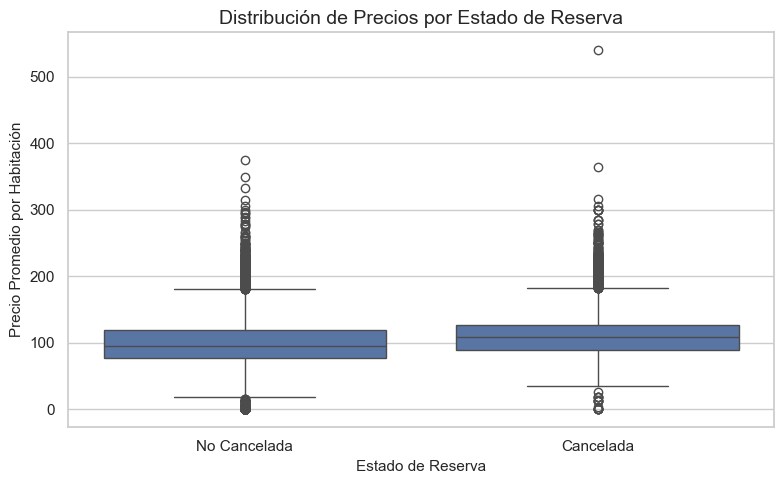

                  count        mean        std  min    25%    50%     75%  \
booking_status                                                              
0               24390.0   99.931412  35.872154  0.0  77.86   95.0  119.10   
1               11885.0  110.589966  32.264394  0.0  89.27  108.0  126.36   

                  max  
booking_status         
0               375.5  
1               540.0  


In [7]:
# Análisis de precios promedio por habitación
plt.figure(figsize=(8, 5))  # Reducido de (12, 6)
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
plt.title('Distribución de Precios por Estado de Reserva', fontsize=14)
plt.xlabel('Estado de Reserva', fontsize=11)
plt.ylabel('Precio Promedio por Habitación', fontsize=11)
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'])
plt.tight_layout()
plt.show()

# Estadísticas de precios por estado de reserva
print(df.groupby('booking_status')['avg_price_per_room'].describe())

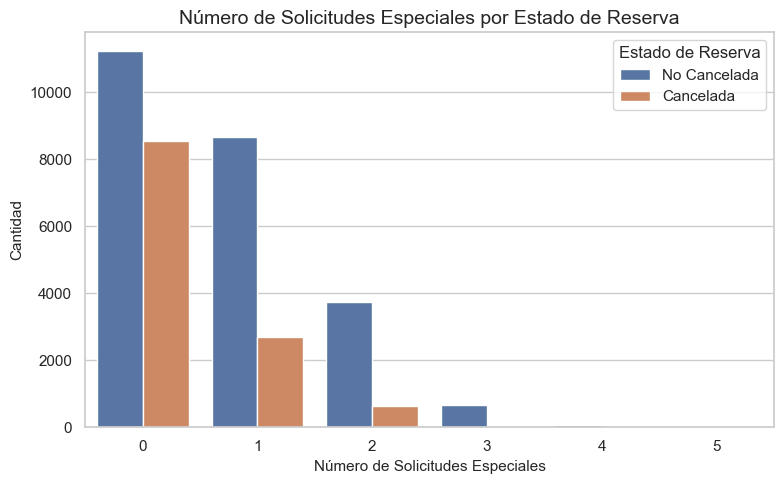

booking_status          No Cancelada  Cancelada
no_of_special_requests                         
0                           0.567932   0.432068
1                           0.762332   0.237668
2                           0.854033   0.145967
3                           1.000000   0.000000
4                           1.000000   0.000000
5                           1.000000   0.000000


In [8]:
# Análisis de solicitudes especiales
plt.figure(figsize=(8, 5))  # Reducido de (12, 6)
sns.countplot(x='no_of_special_requests', hue='booking_status', data=df)
plt.title('Número de Solicitudes Especiales por Estado de Reserva', fontsize=14)
plt.xlabel('Número de Solicitudes Especiales', fontsize=11)
plt.ylabel('Cantidad', fontsize=11)
plt.legend(title='Estado de Reserva', labels=['No Cancelada', 'Cancelada'])
plt.tight_layout()
plt.show()

# Calcular proporción de cancelaciones por número de solicitudes especiales
special_req_cancel = pd.crosstab(df['no_of_special_requests'], df['booking_status'], normalize='index')
special_req_cancel.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
print(special_req_cancel)

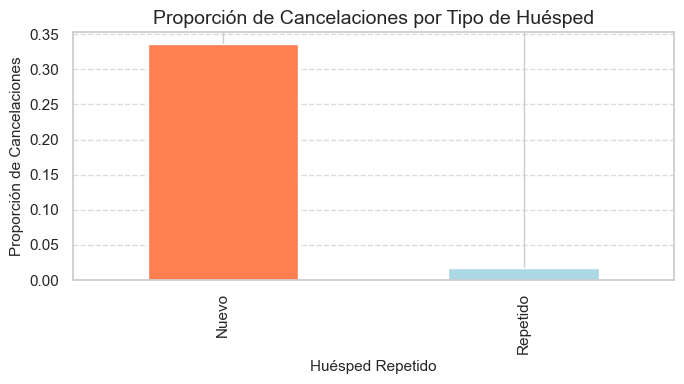

booking_status  No Cancelada  Cancelada  Total  % Cancelada
repeated_guest                                             
0                      23476      11869  35345    33.580422
1                        914         16    930     1.720430


In [9]:
# Análisis de huéspedes repetidos
plt.figure(figsize=(7, 4))  # Reducido de (10, 6)
repeat_guest_cancel = pd.crosstab(df['repeated_guest'], df['booking_status'], normalize='index')
repeat_guest_cancel.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
repeat_guest_cancel['Cancelada'].plot(kind='bar', color=['coral', 'lightblue'])
plt.title('Proporción de Cancelaciones por Tipo de Huésped', fontsize=14)
plt.xlabel('Huésped Repetido', fontsize=11)
plt.ylabel('Proporción de Cancelaciones', fontsize=11)
plt.xticks([0, 1], ['Nuevo', 'Repetido'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar tabla con cantidades
guest_counts = pd.crosstab(df['repeated_guest'], df['booking_status'])
guest_counts.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
guest_counts['Total'] = guest_counts.sum(axis=1)
guest_counts['% Cancelada'] = guest_counts['Cancelada'] / guest_counts['Total'] * 100
print(guest_counts)

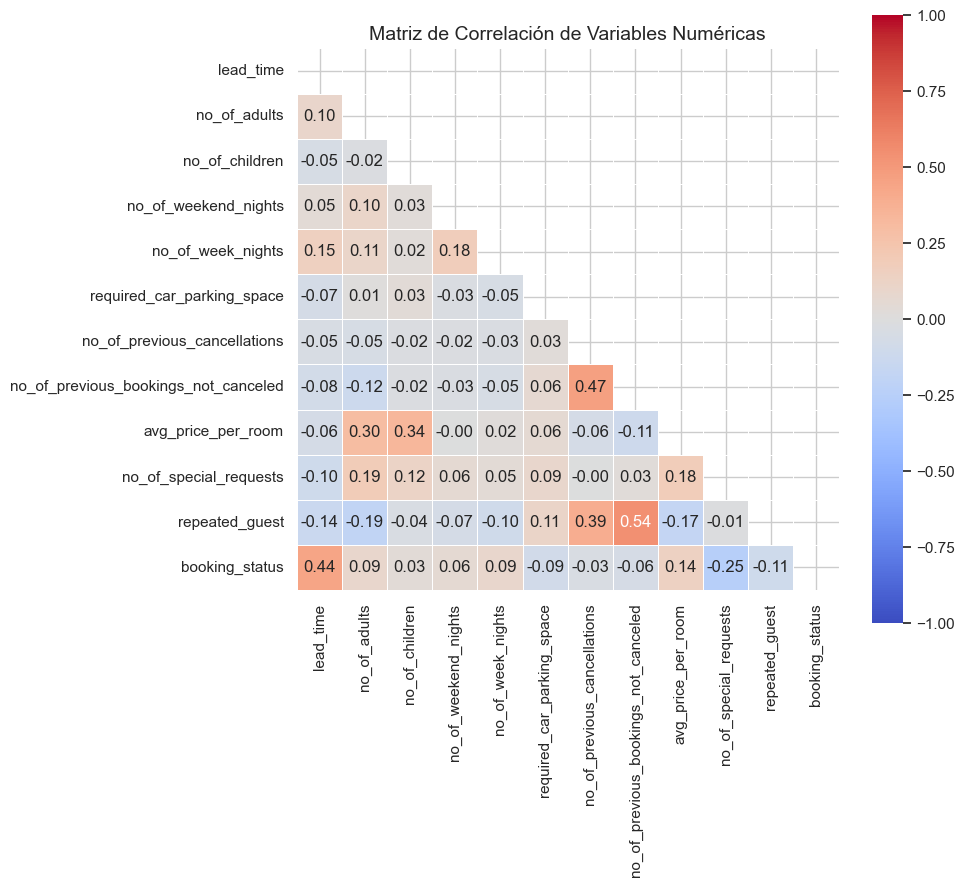

Correlaciones con booking_status (ordenadas):
booking_status                          1.000000
lead_time                               0.438538
avg_price_per_room                      0.142569
no_of_week_nights                       0.092996
no_of_adults                            0.086920
no_of_weekend_nights                    0.061563
no_of_children                          0.033078
no_of_previous_cancellations           -0.033728
no_of_previous_bookings_not_canceled   -0.060179
required_car_parking_space             -0.086185
repeated_guest                         -0.107287
no_of_special_requests                 -0.253070
Name: booking_status, dtype: float64


In [10]:
# Correlación entre variables numéricas
numeric_cols = ['lead_time', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 
                'no_of_week_nights', 'required_car_parking_space', 'no_of_previous_cancellations', 
                'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 
                'no_of_special_requests', 'repeated_guest', 'booking_status']

plt.figure(figsize=(10, 9))
corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, fmt=".2f", square=True)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14)
plt.tight_layout()
plt.show()

# Mostrar las correlaciones con la variable objetivo ordenadas
correlations_with_target = corr_matrix['booking_status'].sort_values(ascending=False)
print("Correlaciones con booking_status (ordenadas):")
print(correlations_with_target)

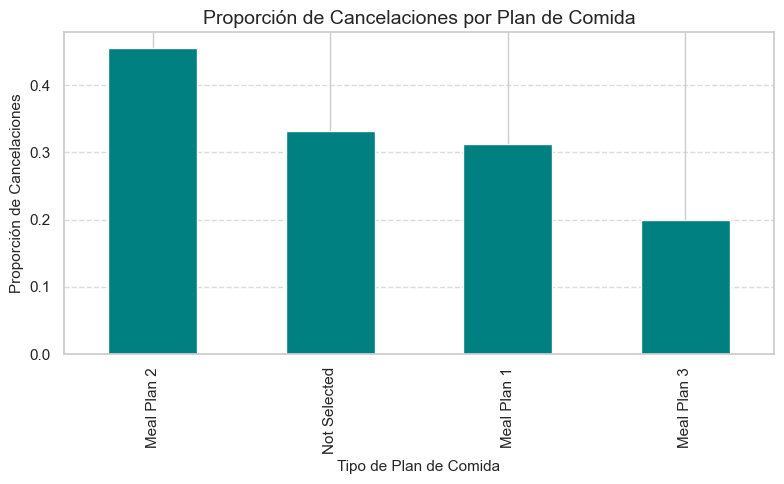

booking_status     No Cancelada  Cancelada  Total  % Cancelada
type_of_meal_plan                                             
Meal Plan 2                1799       1506   3305    45.567322
Not Selected               3431       1699   5130    33.118908
Meal Plan 1               19156       8679  27835    31.180169
Meal Plan 3                   4          1      5    20.000000


In [11]:
# Análisis de tipo de comida
plt.figure(figsize=(8, 5))  # Reducido de (12, 6)
meal_cancel_prop = pd.crosstab(df['type_of_meal_plan'], df['booking_status'], normalize='index')
meal_cancel_prop.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
meal_cancel_prop['Cancelada'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Proporción de Cancelaciones por Plan de Comida', fontsize=14)
plt.xlabel('Tipo de Plan de Comida', fontsize=11)
plt.ylabel('Proporción de Cancelaciones', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar tabla con cantidades
meal_counts = pd.crosstab(df['type_of_meal_plan'], df['booking_status'])
meal_counts.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
meal_counts['Total'] = meal_counts.sum(axis=1)
meal_counts['% Cancelada'] = meal_counts['Cancelada'] / meal_counts['Total'] * 100
print(meal_counts.sort_values(by='% Cancelada', ascending=False))

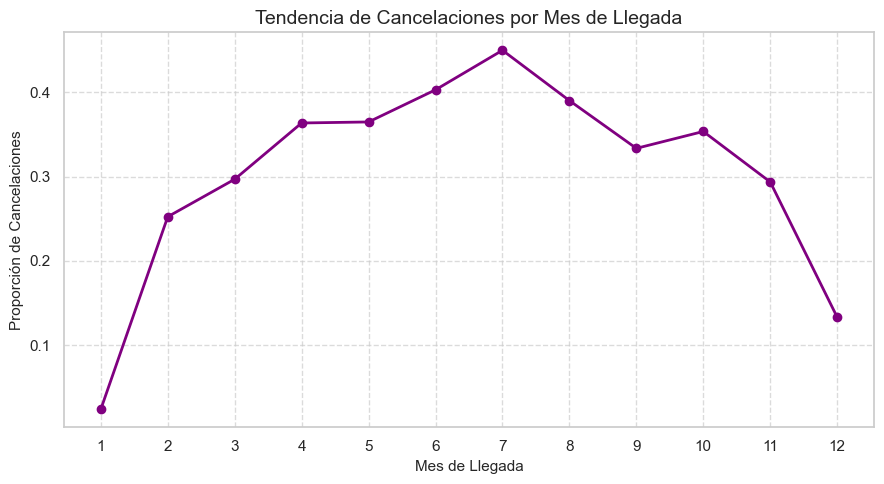

booking_status  No Cancelada  Cancelada  Total  % Cancelada
arrival_month                                              
7                       1606       1314   2920    45.000000
6                       1912       1291   3203    40.305963
8                       2325       1488   3813    39.024390
5                       1650        948   2598    36.489607
4                       1741        995   2736    36.366959
10                      3437       1880   5317    35.358285
9                       3073       1538   4611    33.355021
3                       1658        700   2358    29.686175
11                      2105        875   2980    29.362416
2                       1274        430   1704    25.234742
12                      2619        402   3021    13.306852
1                        990         24   1014     2.366864


In [12]:
# Análisis temporal: mes de llegada
plt.figure(figsize=(9, 5))  # Reducido de (14, 6)
month_cancel_prop = pd.crosstab(df['arrival_month'], df['booking_status'], normalize='index')
month_cancel_prop.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
month_cancel_prop['Cancelada'].plot(kind='line', marker='o', color='purple', linewidth=2)
plt.title('Tendencia de Cancelaciones por Mes de Llegada', fontsize=14)
plt.xlabel('Mes de Llegada', fontsize=11)
plt.ylabel('Proporción de Cancelaciones', fontsize=11)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar estadísticas por mes
month_stats = pd.crosstab(df['arrival_month'], df['booking_status'])
month_stats.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
month_stats['Total'] = month_stats.sum(axis=1)
month_stats['% Cancelada'] = month_stats['Cancelada'] / month_stats['Total'] * 100
print(month_stats.sort_values(by='% Cancelada', ascending=False))

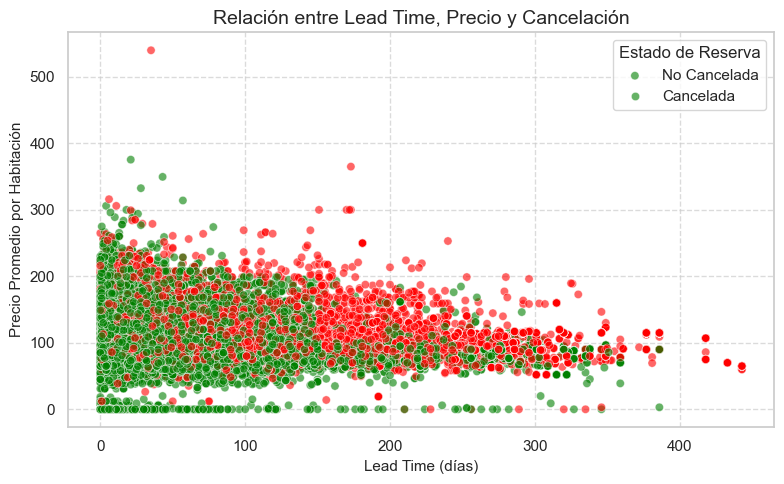

In [13]:
# Análisis multivariado: lead_time, precio y cancelación
plt.figure(figsize=(8, 5))  # Reducido de (12, 8)
sns.scatterplot(data=df, x='lead_time', y='avg_price_per_room', hue='booking_status', 
                alpha=0.6, palette=['green', 'red'])
plt.title('Relación entre Lead Time, Precio y Cancelación', fontsize=14)
plt.xlabel('Lead Time (días)', fontsize=11)
plt.ylabel('Precio Promedio por Habitación', fontsize=11)
plt.legend(title='Estado de Reserva', labels=['No Cancelada', 'Cancelada'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
# Resumen final del EDA
print("RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS:")
print("-" * 50)

# Desbalance de clases
print(f"1. DESBALANCE DE CLASES:")
print(f"   - Reservas canceladas: {canceled:.2f}%")
print(f"   - Reservas no canceladas: {not_canceled:.2f}%")
print()

# Variables más correlacionadas con la cancelación
print(f"2. VARIABLES MÁS CORRELACIONADAS CON LA CANCELACIÓN:")
for var, corr in correlations_with_target.items():
    if var != 'booking_status' and abs(corr) >= 0.1:
        print(f"   - {var}: {corr:.4f}")
print()

# Hallazgos clave
print(f"3. HALLAZGOS CLAVE:")
print(f"   - El tiempo de anticipación (lead_time) muestra una relación positiva con la cancelación")
print(f"   - Los huéspedes repetidos tienen menor probabilidad de cancelar")
print(f"   - El número de solicitudes especiales está negativamente correlacionado con la cancelación")
print(f"   - Hay variaciones significativas en las tasas de cancelación por segmento de mercado")
print(f"   - Se observan patrones estacionales en las cancelaciones por mes de llegada")

RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS:
--------------------------------------------------
1. DESBALANCE DE CLASES:
   - Reservas canceladas: 32.76%
   - Reservas no canceladas: 67.24%

2. VARIABLES MÁS CORRELACIONADAS CON LA CANCELACIÓN:
   - lead_time: 0.4385
   - avg_price_per_room: 0.1426
   - repeated_guest: -0.1073
   - no_of_special_requests: -0.2531

3. HALLAZGOS CLAVE:
   - El tiempo de anticipación (lead_time) muestra una relación positiva con la cancelación
   - Los huéspedes repetidos tienen menor probabilidad de cancelar
   - El número de solicitudes especiales está negativamente correlacionado con la cancelación
   - Hay variaciones significativas en las tasas de cancelación por segmento de mercado
   - Se observan patrones estacionales en las cancelaciones por mes de llegada


In [15]:
# Celda 1: Importar bibliotecas necesarias para el preprocesamiento
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    PolynomialFeatures,
    FunctionTransformer,
)

print("Bibliotecas importadas correctamente.")

Bibliotecas importadas correctamente.


In [16]:
# Celda 2: Verificar valores nulos en el dataset
print("Verificando valores nulos:")
nulos = df.isnull().sum()
print(nulos[nulos > 0] if nulos.any() > 0 else "No hay valores nulos en el dataset.")

Verificando valores nulos:
No hay valores nulos en el dataset.


In [17]:
# Celda 3 (corregida): Identificar variables numéricas y categóricas
# Separamos la variable objetivo del resto de variables
# Excluimos Booking_ID ya que es solo un identificador
X = df.drop(['booking_status', 'Booking_ID'], axis=1)
y = df['booking_status']

# Identificamos automáticamente las variables numéricas y categóricas
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Variables numéricas ({len(numerical_features)}):", numerical_features)
print(f"Variables categóricas ({len(categorical_features)}):", categorical_features)

Variables numéricas (14): ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Variables categóricas (3): ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


In [18]:
# Celda adicional: Verificar valores únicos en variables categóricas
print("Valores únicos en variables categóricas:")
for col in categorical_features:
    unique_values = X[col].nunique()
    print(f"- {col}: {unique_values} valores únicos")

Valores únicos en variables categóricas:
- type_of_meal_plan: 4 valores únicos
- room_type_reserved: 7 valores únicos
- market_segment_type: 5 valores únicos


In [19]:
# Celda 4: Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos un 80% para entrenamiento y 20% para prueba
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

# Verificamos las dimensiones de los conjuntos
print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}, {y_test.shape}")

# Verificamos la distribución de la variable objetivo en cada conjunto
print("\nDistribución de la variable objetivo:")
print("Entrenamiento:")
print(y_train.value_counts(normalize=True) * 100)
print("\nPrueba:")
print(y_test.value_counts(normalize=True) * 100)

Dimensiones del conjunto de entrenamiento: (29020, 17), (29020,)
Dimensiones del conjunto de prueba: (7255, 17), (7255,)

Distribución de la variable objetivo:
Entrenamiento:
booking_status
0    67.236389
1    32.763611
Name: proportion, dtype: float64

Prueba:
booking_status
0    67.236389
1    32.763611
Name: proportion, dtype: float64


In [20]:
# Celda 5: Crear el preprocesador con el enfoque de Pipeline
# Definimos los transformadores para cada tipo de variable
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creamos el preprocesador completo usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    verbose_feature_names_out=False
)

# Creamos el pipeline completo que incluye el preprocesamiento
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

print("Pipeline de preprocesamiento configurado.")

Pipeline de preprocesamiento configurado.


In [21]:
# Celda 6: Aplicar el preprocesamiento a los datos de entrenamiento
# Ajustamos el preprocesador a los datos de entrenamiento
pipeline.fit(X_train)

# Transformamos los datos de entrenamiento y prueba
X_train_preprocessed = pipeline.transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# Obtenemos los nombres de las características después del preprocesamiento
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

print(f"Dimensiones después del preprocesamiento:")
print(f"X_train: {X_train_preprocessed.shape}")
print(f"X_test: {X_test_preprocessed.shape}")

Dimensiones después del preprocesamiento:
X_train: (29020, 30)
X_test: (7255, 30)


In [22]:
# Celda 7: Mostrar algunas de las nuevas características generadas
print(f"Primeras 10 características después del preprocesamiento:")
for i, feature in enumerate(feature_names[:10]):
    print(f"- {feature}")
print("...")

Primeras 10 características después del preprocesamiento:
- no_of_adults
- no_of_children
- no_of_weekend_nights
- no_of_week_nights
- required_car_parking_space
- lead_time
- arrival_year
- arrival_month
- arrival_date
- repeated_guest
...


In [23]:
# Celda 8: Analizar el desbalance de clases para futuros modelos
print(f"Distribución de clases en el conjunto de entrenamiento:")
class_distribution = y_train.value_counts(normalize=True) * 100
print(f"- Clase 0 (No cancelada): {(y_train == 0).sum()} muestras ({class_distribution[0]:.2f}%)")
print(f"- Clase 1 (Cancelada): {(y_train == 1).sum()} muestras ({class_distribution[1]:.2f}%)")

# Calculamos el peso para la clase minoritaria (para usar en los modelos)
weight_ratio = (y_train == 0).sum() / (y_train == 1).sum()
print(f"\nRatio de desbalance (mayoría/minoría): {weight_ratio:.2f}")
print(f"Recomendación: Usar 'class_weight='balanced'' o {{0:1, 1:{weight_ratio:.2f}}} en los modelos")

# Alternativas a SMOTE
print("\nAlternativas para manejar el desbalance:")
print("1. Usar class_weight='balanced' en los modelos")
print("2. Utilizar la métrica roc_auc_score en lugar de accuracy para la evaluación")
print("3. Ajustar el umbral de clasificación según la curva ROC")

Distribución de clases en el conjunto de entrenamiento:
- Clase 0 (No cancelada): 19512 muestras (67.24%)
- Clase 1 (Cancelada): 9508 muestras (32.76%)

Ratio de desbalance (mayoría/minoría): 2.05
Recomendación: Usar 'class_weight='balanced'' o {0:1, 1:2.05} en los modelos

Alternativas para manejar el desbalance:
1. Usar class_weight='balanced' en los modelos
2. Utilizar la métrica roc_auc_score en lugar de accuracy para la evaluación
3. Ajustar el umbral de clasificación según la curva ROC


In [24]:
# Celda 1: Implementar modelos con Pipeline y GridSearchCV similar a la clase
# Ya definimos las transformaciones en el preprocesamiento anterior
# Utilizaremos esos datos preprocesados

# Definimos nuestros clasificadores base
lr_base = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced')
gb_base = GradientBoostingClassifier(random_state=42)

# Como ya tenemos los datos preprocesados, no necesitamos incluir el preprocesador en el pipeline
# Definimos los pipelines directamente con los clasificadores
pipeline_lr = Pipeline(steps=[
    ('classifier', lr_base)
])

pipeline_rf = Pipeline(steps=[
    ('classifier', rf_base)
])

pipeline_gb = Pipeline(steps=[
    ('classifier', gb_base)
])

# Definimos las mallas de parámetros para cada modelo
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0],
    'classifier__solver': ['liblinear', 'saga']
}

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30]
}

param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# Definimos nuestros modelos mediante GridSearchCV
lr = GridSearchCV(pipeline_lr, cv=3, param_grid=param_grid_lr, n_jobs=-1, verbose=2, scoring='roc_auc')
rf = GridSearchCV(pipeline_rf, cv=3, param_grid=param_grid_rf, n_jobs=-1, verbose=2, scoring='roc_auc')
gb = GridSearchCV(pipeline_gb, cv=3, param_grid=param_grid_gb, n_jobs=-1, verbose=2, scoring='roc_auc')

print("Pipelines y GridSearchCV configurados correctamente.")

Pipelines y GridSearchCV configurados correctamente.


In [35]:
# Celda 2: Entrenar la Regresión Logística
print("Entrenando Regresión Logística con GridSearchCV...")
%time lr.fit(X_train_preprocessed, y_train)

Entrenando Regresión Logística con GridSearchCV...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
CPU times: total: 625 ms
Wall time: 28.8 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1.0, 10.0],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='roc_auc', verbose=2)

In [36]:
# Celda 3: Entrenar Random Forest
print("Entrenando Random Forest con GridSearchCV...")
%time rf.fit(X_train_preprocessed, y_train)

Entrenando Random Forest con GridSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
CPU times: total: 5.38 s
Wall time: 28.2 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=2)

In [37]:
# Celda 4: Entrenar Gradient Boosting
print("Entrenando Gradient Boosting con GridSearchCV...")
%time gb.fit(X_train_preprocessed, y_train)

Entrenando Gradient Boosting con GridSearchCV...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
CPU times: total: 24.8 s
Wall time: 2min 26s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=2)

In [38]:
# Celda 5: Mostrar los mejores parámetros encontrados
print("Mejores parámetros para Regresión Logística:")
print(lr.best_params_)
print("\nMejores parámetros para Random Forest:")
print(rf.best_params_)
print("\nMejores parámetros para Gradient Boosting:")
print(gb.best_params_)

Mejores parámetros para Regresión Logística:
{'classifier__C': 10.0, 'classifier__solver': 'liblinear'}

Mejores parámetros para Random Forest:
{'classifier__max_depth': 20, 'classifier__n_estimators': 200}

Mejores parámetros para Gradient Boosting:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200}


In [39]:
# Celda 6: Evaluar los modelos en conjuntos de entrenamiento y prueba
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Conjunto de Entrenamiento:")
for model, name in [(lr, "Regresión Logística"), (rf, "Random Forest"), (gb, "Gradient Boosting")]:
    # Para clasificación, usamos accuracy y ROC AUC en lugar de R^2
    print(f"Modelo: {name}")
    y_train_pred = model.predict(X_train_preprocessed)
    y_train_proba = model.predict_proba(X_train_preprocessed)[:, 1]
    
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
    print(f"F1-Score: {f1_score(y_train, y_train_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_train, y_train_proba):.4f}")
    print()

print("\nConjunto de Prueba:")
for model, name in [(lr, "Regresión Logística"), (rf, "Random Forest"), (gb, "Gradient Boosting")]:
    print(f"Modelo: {name}")
    y_test_pred = model.predict(X_test_preprocessed)
    y_test_proba = model.predict_proba(X_test_preprocessed)[:, 1]
    
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba):.4f}")
    print()

Conjunto de Entrenamiento:
Modelo: Regresión Logística
Accuracy: 0.7788
Precision: 0.6341
Recall: 0.7677
F1-Score: 0.6945
ROC AUC: 0.8621

Modelo: Random Forest
Accuracy: 0.9542
Precision: 0.9158
Recall: 0.9472
F1-Score: 0.9312
ROC AUC: 0.9930

Modelo: Gradient Boosting
Accuracy: 0.9406
Precision: 0.9328
Recall: 0.8822
F1-Score: 0.9068
ROC AUC: 0.9865


Conjunto de Prueba:
Modelo: Regresión Logística
Accuracy: 0.7859
Precision: 0.6438
Recall: 0.7762
F1-Score: 0.7038
ROC AUC: 0.8711

Modelo: Random Forest
Accuracy: 0.9031
Precision: 0.8642
Recall: 0.8355
F1-Score: 0.8496
ROC AUC: 0.9577

Modelo: Gradient Boosting
Accuracy: 0.9017
Precision: 0.8778
Recall: 0.8132
F1-Score: 0.8443
ROC AUC: 0.9590



In [41]:
# Celda 7: Visualizar las predicciones y datos reales
# Crear un DataFrame con algunas muestras aleatorias del conjunto de prueba
import numpy as np

# Seleccionar 10 muestras aleatorias
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), 10, replace=False)

# Obtener las muestras y sus predicciones
sample_X = X_test.iloc[sample_indices]
sample_y = y_test.iloc[sample_indices]

# Hacer predicciones con los tres modelos
lr_predictions = lr.predict(X_test_preprocessed[sample_indices])
rf_predictions = rf.predict(X_test_preprocessed[sample_indices])
gb_predictions = gb.predict(X_test_preprocessed[sample_indices])

# Probabilidades de cancelación
lr_probas = lr.predict_proba(X_test_preprocessed[sample_indices])[:, 1]
rf_probas = rf.predict_proba(X_test_preprocessed[sample_indices])[:, 1]
gb_probas = gb.predict_proba(X_test_preprocessed[sample_indices])[:, 1]

# Crear DataFrame con las predicciones
results_df = pd.DataFrame({
    'Estado Real': ['Cancelada' if y == 1 else 'No Cancelada' for y in sample_y],
    'LR Predicción': ['Cancelada' if p == 1 else 'No Cancelada' for p in lr_predictions],
    'LR Probabilidad': lr_probas,
    'RF Predicción': ['Cancelada' if p == 1 else 'No Cancelada' for p in rf_predictions],
    'RF Probabilidad': rf_probas,
    'GB Predicción': ['Cancelada' if p == 1 else 'No Cancelada' for p in gb_predictions],
    'GB Probabilidad': gb_probas,
})

# Mostrar el DataFrame
print("Comparación de predicciones en muestras aleatorias:")
print(results_df)

# Agregar información de algunas características importantes
important_features = ['lead_time', 'no_of_special_requests', 'avg_price_per_room', 
                      'repeated_guest', 'market_segment_type', 'type_of_meal_plan']

# Crear un DataFrame con las características importantes
features_df = sample_X[important_features].reset_index(drop=True)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

print("\nCaracterísticas importantes de las muestras:")
print(features_df)

Comparación de predicciones en muestras aleatorias:
    Estado Real LR Predicción  LR Probabilidad RF Predicción  RF Probabilidad  \
0  No Cancelada  No Cancelada         0.293500  No Cancelada         0.217405   
1  No Cancelada  No Cancelada         0.213062  No Cancelada         0.444415   
2     Cancelada     Cancelada         0.825261     Cancelada         0.712061   
3  No Cancelada  No Cancelada         0.167253  No Cancelada         0.033308   
4  No Cancelada     Cancelada         0.620210  No Cancelada         0.177299   
5     Cancelada     Cancelada         0.940885     Cancelada         1.000000   
6  No Cancelada  No Cancelada         0.000530  No Cancelada         0.019563   
7  No Cancelada  No Cancelada         0.264978  No Cancelada         0.001955   
8     Cancelada     Cancelada         0.750952     Cancelada         0.509956   
9  No Cancelada     Cancelada         0.646568  No Cancelada         0.250705   

  GB Predicción  GB Probabilidad  
0  No Cancelada      

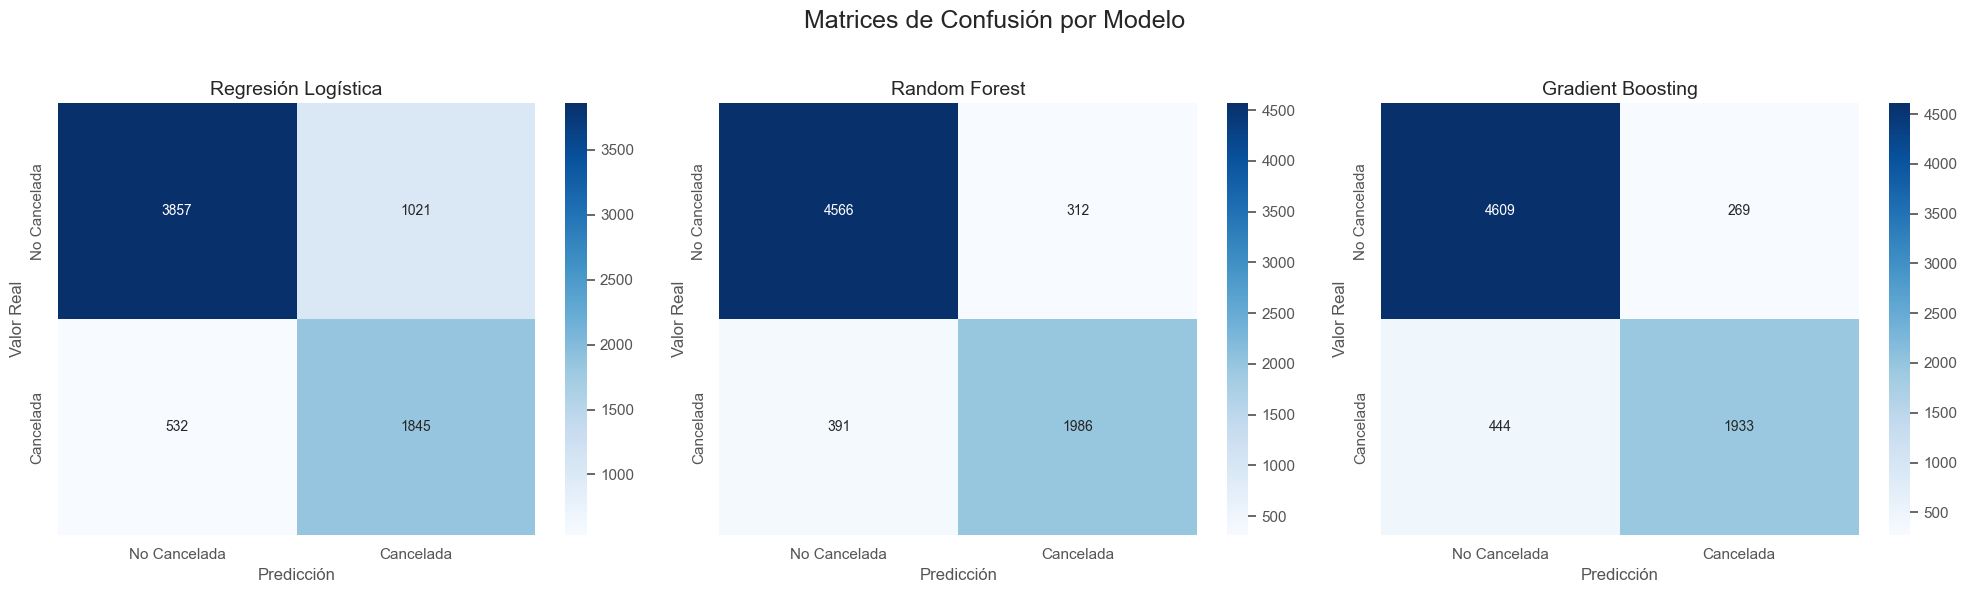

RESUMEN DE LAS MATRICES DE CONFUSIÓN:
--------------------------------------------------
Regresión Logística:
  - Verdaderos Negativos: 3857 (correctamente clasificados como no canceladas)
  - Falsos Positivos: 1021 (incorrectamente clasificados como canceladas)
  - Falsos Negativos: 532 (incorrectamente clasificados como no canceladas)
  - Verdaderos Positivos: 1845 (correctamente clasificados como canceladas)
  - Precisión: 0.6438
  - Recall: 0.7762

Random Forest:
  - Verdaderos Negativos: 4566 (correctamente clasificados como no canceladas)
  - Falsos Positivos: 312 (incorrectamente clasificados como canceladas)
  - Falsos Negativos: 391 (incorrectamente clasificados como no canceladas)
  - Verdaderos Positivos: 1986 (correctamente clasificados como canceladas)
  - Precisión: 0.8642
  - Recall: 0.8355

Gradient Boosting:
  - Verdaderos Negativos: 4609 (correctamente clasificados como no canceladas)
  - Falsos Positivos: 269 (incorrectamente clasificados como canceladas)
  - Falsos 

In [54]:
# Celda 8: Visualizar matrices de confusión para los modelos en una sola figura
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con 3 subgráficas (1x3)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Matrices de Confusión por Modelo', fontsize=18)

# Generar predicciones
lr_pred = lr.predict(X_test_preprocessed)
rf_pred = rf.predict(X_test_preprocessed)
gb_pred = gb.predict(X_test_preprocessed)

# Matriz de Confusión - Regresión Logística
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Cancelada', 'Cancelada'],
            yticklabels=['No Cancelada', 'Cancelada'], 
            ax=axes[0])
axes[0].set_title('Regresión Logística', fontsize=14)
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')

# Matriz de Confusión - Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Cancelada', 'Cancelada'],
            yticklabels=['No Cancelada', 'Cancelada'], 
            ax=axes[1])
axes[1].set_title('Random Forest', fontsize=14)
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Valor Real')

# Matriz de Confusión - Gradient Boosting
cm_gb = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Cancelada', 'Cancelada'],
            yticklabels=['No Cancelada', 'Cancelada'], 
            ax=axes[2])
axes[2].set_title('Gradient Boosting', fontsize=14)
axes[2].set_xlabel('Predicción')
axes[2].set_ylabel('Valor Real')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio entre subgráficas
plt.show()

# Extraer y mostrar valores de las matrices
print("RESUMEN DE LAS MATRICES DE CONFUSIÓN:")
print("--------------------------------------------------")

# Regresión Logística
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()
print(f"Regresión Logística:")
print(f"  - Verdaderos Negativos: {tn_lr} (correctamente clasificados como no canceladas)")
print(f"  - Falsos Positivos: {fp_lr} (incorrectamente clasificados como canceladas)")
print(f"  - Falsos Negativos: {fn_lr} (incorrectamente clasificados como no canceladas)")
print(f"  - Verdaderos Positivos: {tp_lr} (correctamente clasificados como canceladas)")
print(f"  - Precisión: {tp_lr/(tp_lr+fp_lr):.4f}")
print(f"  - Recall: {tp_lr/(tp_lr+fn_lr):.4f}")
print()

# Random Forest
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
print(f"Random Forest:")
print(f"  - Verdaderos Negativos: {tn_rf} (correctamente clasificados como no canceladas)")
print(f"  - Falsos Positivos: {fp_rf} (incorrectamente clasificados como canceladas)")
print(f"  - Falsos Negativos: {fn_rf} (incorrectamente clasificados como no canceladas)")
print(f"  - Verdaderos Positivos: {tp_rf} (correctamente clasificados como canceladas)")
print(f"  - Precisión: {tp_rf/(tp_rf+fp_rf):.4f}")
print(f"  - Recall: {tp_rf/(tp_rf+fn_rf):.4f}")
print()

# Gradient Boosting
tn_gb, fp_gb, fn_gb, tp_gb = cm_gb.ravel()
print(f"Gradient Boosting:")
print(f"  - Verdaderos Negativos: {tn_gb} (correctamente clasificados como no canceladas)")
print(f"  - Falsos Positivos: {fp_gb} (incorrectamente clasificados como canceladas)")
print(f"  - Falsos Negativos: {fn_gb} (incorrectamente clasificados como no canceladas)")
print(f"  - Verdaderos Positivos: {tp_gb} (correctamente clasificados como canceladas)")
print(f"  - Precisión: {tp_gb/(tp_gb+fp_gb):.4f}")
print(f"  - Recall: {tp_gb/(tp_gb+fn_gb):.4f}")

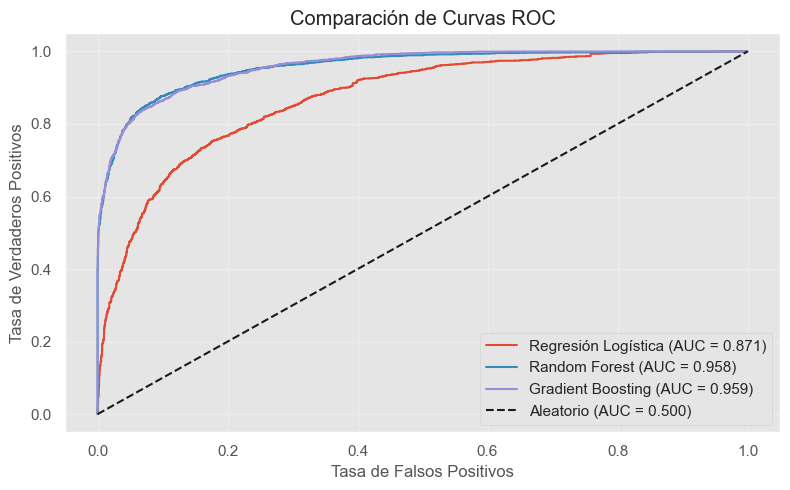

In [62]:
# Celda 9: Visualizar curvas ROC para comparar modelos
from sklearn.metrics import roc_curve, auc

# Calcular probabilidades de predicción
lr_proba = lr.predict_proba(X_test_preprocessed)[:, 1]
rf_proba = rf.predict_proba(X_test_preprocessed)[:, 1]
gb_proba = gb.predict_proba(X_test_preprocessed)[:, 1]

# Calcular curvas ROC
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_proba)

# Calcular AUC
lr_auc = auc(lr_fpr, lr_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

# Graficar curvas ROC
plt.figure(figsize=(8, 5))
plt.plot(lr_fpr, lr_tpr, label=f'Regresión Logística (AUC = {lr_auc:.3f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.500)')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de Curvas ROC')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

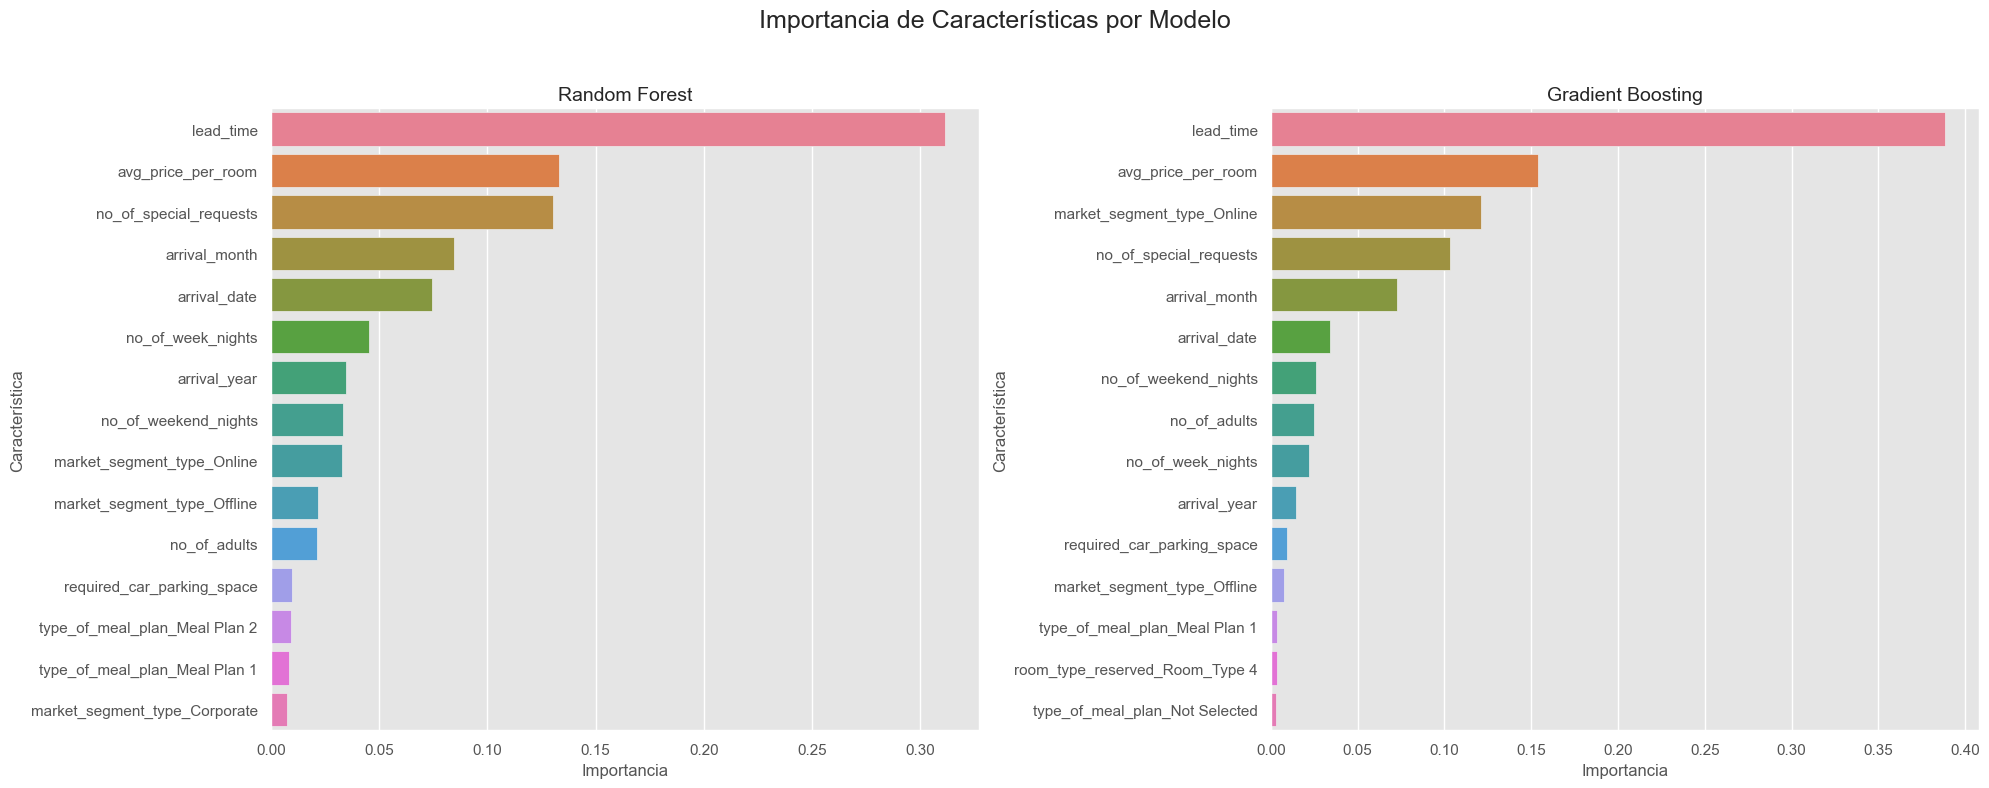

COMPARACIÓN DE CARACTERÍSTICAS MÁS IMPORTANTES:
--------------------------------------------------
                    RF Feature RF Importance                  GB Feature  \
0                    lead_time        0.3114                   lead_time   
1           avg_price_per_room        0.1332          avg_price_per_room   
2       no_of_special_requests        0.1306  market_segment_type_Online   
3                arrival_month        0.0844      no_of_special_requests   
4                 arrival_date        0.0743               arrival_month   
5            no_of_week_nights        0.0452                arrival_date   
6                 arrival_year        0.0349        no_of_weekend_nights   
7         no_of_weekend_nights        0.0335                no_of_adults   
8   market_segment_type_Online        0.0328           no_of_week_nights   
9  market_segment_type_Offline        0.0217                arrival_year   

  GB Importance  
0        0.3883  
1        0.1539  
2        0

In [56]:
# Celda 10: Analizar importancia de características para los modelos basados en árboles en una sola figura
# Crear una figura con 2 subgráficas (1x2)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Importancia de Características por Modelo', fontsize=18)

# Importancia de características para Random Forest
rf_best = rf.best_estimator_.named_steps['classifier']
rf_importances = rf_best.feature_importances_

# Crear DataFrame para visualización de Random Forest
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Visualizar las 15 características más importantes para Random Forest
# Corregimos la advertencia usando hue con legend=False
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=rf_importance_df.head(15), 
    hue='Feature',  # Usar Feature como variable hue
    legend=False,   # No mostrar la leyenda
    ax=axes[0]
)
axes[0].set_title('Random Forest', fontsize=14)
axes[0].set_xlabel('Importancia')
axes[0].set_ylabel('Característica')

# Importancia de características para Gradient Boosting
gb_best = gb.best_estimator_.named_steps['classifier']
gb_importances = gb_best.feature_importances_

# Crear DataFrame para visualización de Gradient Boosting
gb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_importances
}).sort_values(by='Importance', ascending=False)

# Visualizar las 15 características más importantes para Gradient Boosting
# Corregimos la advertencia usando hue con legend=False
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=gb_importance_df.head(15), 
    hue='Feature',  # Usar Feature como variable hue
    legend=False,   # No mostrar la leyenda
    ax=axes[1]
)
axes[1].set_title('Gradient Boosting', fontsize=14)
axes[1].set_xlabel('Importancia')
axes[1].set_ylabel('Característica')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio entre subgráficas
plt.show()

# Tabla comparativa de las top 10 características para ambos modelos
print("COMPARACIÓN DE CARACTERÍSTICAS MÁS IMPORTANTES:")
print("--------------------------------------------------")

# Crear una tabla comparativa
comparison_df = pd.DataFrame({
    'RF Feature': rf_importance_df['Feature'].iloc[:10].values,
    'RF Importance': rf_importance_df['Importance'].iloc[:10].values,
    'GB Feature': gb_importance_df['Feature'].iloc[:10].values,
    'GB Importance': gb_importance_df['Importance'].iloc[:10].values
})

# Formatear los valores de importancia a 4 decimales
comparison_df['RF Importance'] = comparison_df['RF Importance'].apply(lambda x: f"{x:.4f}")
comparison_df['GB Importance'] = comparison_df['GB Importance'].apply(lambda x: f"{x:.4f}")

# Mostrar la tabla comparativa
print(comparison_df)

# Análisis de coincidencias en las top 5 características
rf_top5 = set(rf_importance_df['Feature'].iloc[:5])
gb_top5 = set(gb_importance_df['Feature'].iloc[:5])
common_top5 = rf_top5.intersection(gb_top5)

print("\nCaracterísticas comunes en el top 5 de ambos modelos:")
for feature in common_top5:
    rf_rank = rf_importance_df[rf_importance_df['Feature'] == feature].index[0] + 1
    gb_rank = gb_importance_df[gb_importance_df['Feature'] == feature].index[0] + 1
    rf_imp = rf_importance_df[rf_importance_df['Feature'] == feature]['Importance'].values[0]
    gb_imp = gb_importance_df[gb_importance_df['Feature'] == feature]['Importance'].values[0]
    print(f"- {feature}: RF rank={rf_rank} (Imp={rf_imp:.4f}), GB rank={gb_rank} (Imp={gb_imp:.4f})")

In [63]:
# Celda 11: 
# !pip install shap
%pip install -q shap

import shap
from IPython.display import HTML

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
# Celda 12: Entrenar el mejor modelo con los parámetros optimizados
# Identificar el mejor modelo basado en ROC AUC
if gb_auc > rf_auc:
    best_model_name = "Gradient Boosting"
    best_pipeline = pipeline_gb
    best_grid = gb
else:
    best_model_name = "Random Forest"
    best_pipeline = pipeline_rf
    best_grid = rf

print(f"El mejor modelo es: {best_model_name} con ROC AUC: {max(gb_auc, rf_auc):.4f}")
print(f"Mejores parámetros: {best_grid.best_params_}")

# Entrenar el pipeline con los mejores parámetros encontrados
best_pipeline.set_params(**best_grid.best_params_)
best_pipeline.fit(X_train_preprocessed, y_train)

print(f"\nModelo {best_model_name} entrenado exitosamente con los parámetros optimizados.")

El mejor modelo es: Gradient Boosting con ROC AUC: 0.9590
Mejores parámetros: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200}

Modelo Gradient Boosting entrenado exitosamente con los parámetros optimizados.


In [65]:
# Celda 13: Preparar el explicador SHAP
import numpy as np
import time

# Para reducir el tiempo de cálculo, usamos una muestra de datos
np.random.seed(42)
sample_indices = np.random.choice(len(X_test_preprocessed), 100, replace=False)
X_sample = X_test_preprocessed[sample_indices]
y_sample = y_test.iloc[sample_indices]

print(f"Creando explicador SHAP para el modelo {best_model_name}...")

# Medir el tiempo que toma calcular los valores SHAP
start_time = time.time()

# Acceder al modelo dentro del pipeline
model = best_pipeline.named_steps['classifier']

# Crear el objeto explicador SHAP
explainer = shap.TreeExplainer(model)

print(f"Explicador SHAP creado en {time.time() - start_time:.2f} segundos.")

Creando explicador SHAP para el modelo Gradient Boosting...
Explicador SHAP creado en 0.03 segundos.


In [81]:
# Celda 14: Calcular valores SHAP
print("Calculando valores SHAP para la muestra de prueba...")
start_time = time.time()

# Calcular valores SHAP para la muestra
shap_values = explainer.shap_values(X_sample)

# Si es un modelo de clasificación con 2 clases, shap_values será una lista con dos elementos
if isinstance(shap_values, list):
    print("El modelo devuelve múltiples conjuntos de valores SHAP (uno por clase).")
    print(f"Forma del primer conjunto: {shap_values[0].shape}")
    print(f"Forma del segundo conjunto: {shap_values[1].shape}")
    # Tomamos los valores para la clase positiva (cancelación)
    shap_values_class1 = shap_values[1]
    expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value
else:
    print("El modelo devuelve un solo conjunto de valores SHAP.")
    print(f"Forma de los valores SHAP: {shap_values.shape}")
    shap_values_class1 = shap_values
    expected_value = explainer.expected_value

print(f"Cálculo de valores SHAP completado en {time.time() - start_time:.2f} segundos.")
print(f"Valor base del modelo (expected_value): {expected_value}")

Calculando valores SHAP para la muestra de prueba...
El modelo devuelve un solo conjunto de valores SHAP.
Forma de los valores SHAP: (100, 30)
Cálculo de valores SHAP completado en 0.43 segundos.
Valor base del modelo (expected_value): [-1.51925367]


C:\Users\samue\AppData\Local\Temp\ipykernel_30200\2489605477.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


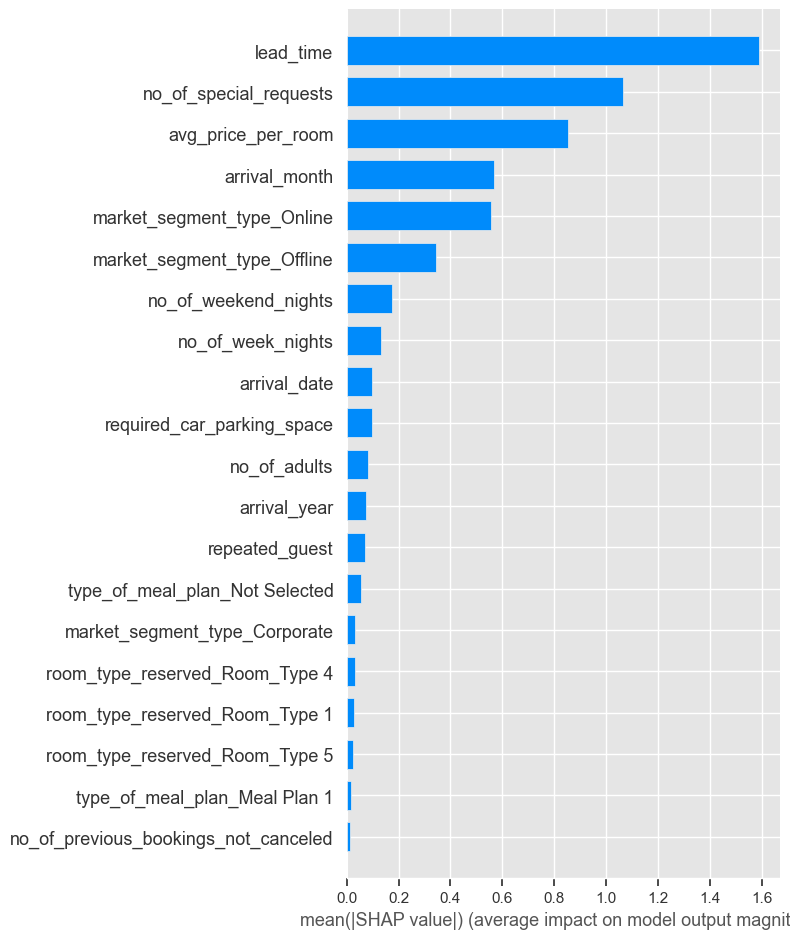

In [89]:
# Celda 15: SHAP Summary Plot
shap.summary_plot(
    shap_values_class1, 
    X_sample, 
    feature_names=feature_names,
    plot_type="bar"
)

<Figure size 1200x600 with 0 Axes>

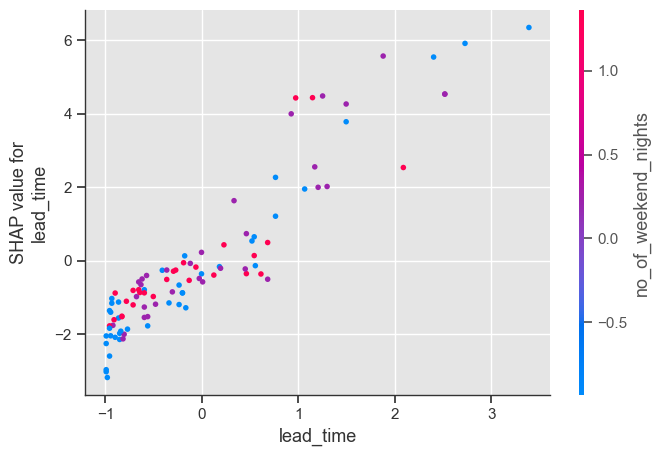

Interpretación del Dependence Plot para lead_time:
- Muestra cómo el valor de esta característica afecta su contribución a la predicción.
- Eje X: Valor real de la característica en la muestra.
- Eje Y: Valor SHAP (impacto en la predicción).
- La tendencia indica cómo los diferentes valores de la característica afectan la
  probabilidad de cancelación.


In [91]:
# Celda 16 (corregida): SHAP Dependence Plot para la característica más importante
# Identificar la característica más importante según SHAP
most_important_feat_idx = np.argmax(np.abs(shap_values_class1).mean(0))
most_important_feat = feature_names[most_important_feat_idx]

# Aseguramos que se crea una nueva figura
plt.figure(figsize=(12, 6))
# Usamos matplotlib=True para asegurar que el plot se renderiza
shap.dependence_plot(
    most_important_feat_idx, 
    shap_values_class1, 
    X_sample, 
    feature_names=feature_names,
    show=True
)

print(f"Interpretación del Dependence Plot para {most_important_feat}:")
print("- Muestra cómo el valor de esta característica afecta su contribución a la predicción.")
print("- Eje X: Valor real de la característica en la muestra.")
print("- Eje Y: Valor SHAP (impacto en la predicción).")
print("- La tendencia indica cómo los diferentes valores de la característica afectan la")
print("  probabilidad de cancelación.")


--- Explicación para una reserva CANCELADA (muestra #2) ---
Valores de las 5 características más influyentes:
- no_of_special_requests: valor=-0.7893, SHAP=0.9839 (aumenta la probabilidad)
- avg_price_per_room: valor=-0.8643, SHAP=-0.8307 (disminuye la probabilidad)
- market_segment_type_Online: valor=1.0000, SHAP=0.6943 (aumenta la probabilidad)
- no_of_week_nights: valor=4.1176, SHAP=0.5333 (aumenta la probabilidad)
- type_of_meal_plan_Not Selected: valor=1.0000, SHAP=0.3630 (aumenta la probabilidad)


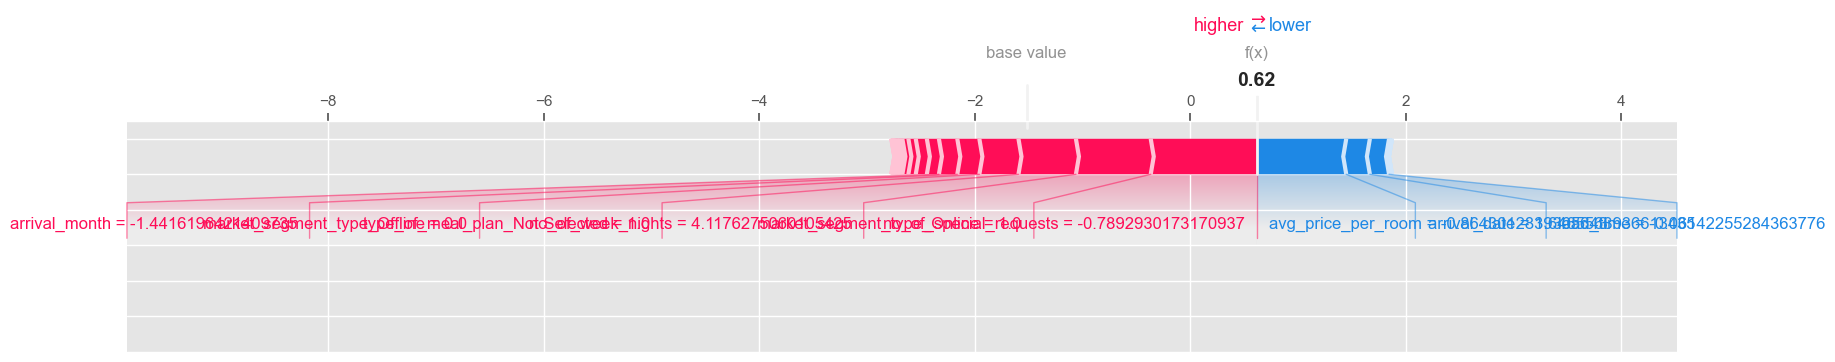

None

In [95]:
# Celda 17: SHAP Force Plot para ejemplos específicos
# Elegimos 2 ejemplos: una reserva cancelada y una no cancelada
canceled_indices = np.where(y_sample == 1)[0][:1]  # Una observación cancelada
not_canceled_indices = np.where(y_sample == 0)[0][:1]  # Una observación no cancelada

# Inicializar JavaScript para visualizaciones interactivas
shap.initjs()

# Mostrar el SHAP Force Plot para una reserva cancelada
if len(canceled_indices) > 0:
    idx = canceled_indices[0]
    print(f"\n--- Explicación para una reserva CANCELADA (muestra #{idx}) ---")
    
    # Valores originales de las 5 características más importantes
    shap_importance = np.abs(shap_values_class1[idx])
    top_indices = np.argsort(shap_importance)[-5:]  # Top 5 características
    
    print("Valores de las 5 características más influyentes:")
    for i in reversed(top_indices):
        feature_name = feature_names[i]
        feature_value = X_sample[idx, i]
        shap_value = shap_values_class1[idx, i]
        impact = "aumenta" if shap_value > 0 else "disminuye"
        print(f"- {feature_name}: valor={feature_value:.4f}, SHAP={shap_value:.4f} ({impact} la probabilidad)")
    
    # Visualizar el force plot
    display(shap.force_plot(
        expected_value,
        shap_values_class1[idx],
        X_sample[idx],
        feature_names=feature_names,
        matplotlib=True,
        show=True
    ))


--- Explicación para una reserva NO CANCELADA (muestra #0) ---
Valores de las 5 características más influyentes:
- lead_time: valor=-0.8286, SHAP=-1.5277 (disminuye la probabilidad)
- no_of_special_requests: valor=0.4839, SHAP=-0.6453 (disminuye la probabilidad)
- arrival_month: valor=-1.4416, SHAP=0.5071 (aumenta la probabilidad)
- market_segment_type_Online: valor=1.0000, SHAP=0.3825 (aumenta la probabilidad)
- avg_price_per_room: valor=0.1572, SHAP=0.2747 (aumenta la probabilidad)


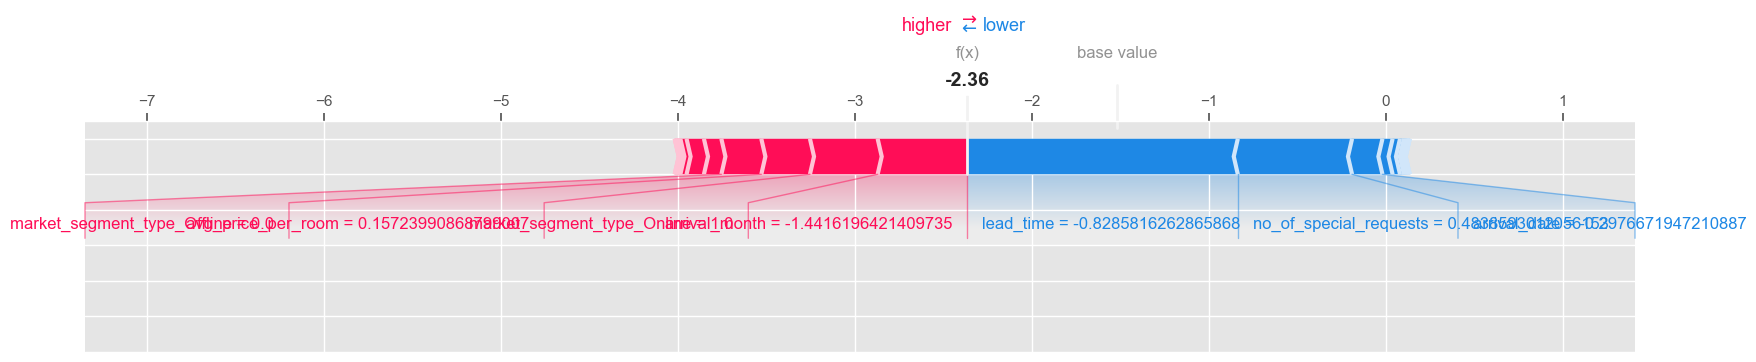

None

In [100]:
# Celda 18: SHAP Force Plot para una reserva no cancelada
# Mostrar el SHAP Force Plot para una reserva no cancelada
if len(not_canceled_indices) > 0:
    idx = not_canceled_indices[0]
    print(f"\n--- Explicación para una reserva NO CANCELADA (muestra #{idx}) ---")
    
    # Valores originales de las 5 características más importantes
    shap_importance = np.abs(shap_values_class1[idx])
    top_indices = np.argsort(shap_importance)[-5:]  # Top 5 características
    
    print("Valores de las 5 características más influyentes:")
    for i in reversed(top_indices):
        feature_name = feature_names[i]
        feature_value = X_sample[idx, i]
        shap_value = shap_values_class1[idx, i]
        impact = "aumenta" if shap_value > 0 else "disminuye"
        print(f"- {feature_name}: valor={feature_value:.4f}, SHAP={shap_value:.4f} ({impact} la probabilidad)")
    
    # Visualizar el force plot
    display(shap.force_plot(
        expected_value,
        shap_values_class1[idx],
        X_sample[idx],
        feature_names=feature_names,
        matplotlib=True,
        show=True
    ))

In [97]:
# Celda 19: Interpretación general y conclusiones de SHAP
print("INTERPRETACIÓN GENERAL DE LOS VALORES SHAP:")
print("--------------------------------------------------")
print("1. Los valores SHAP explican cómo cada característica contribuye a la predicción.")
print("   - Valores positivos (rojo): Aumentan la probabilidad de cancelación")
print("   - Valores negativos (azul): Disminuyen la probabilidad de cancelación")
print("\n2. Las características más importantes según SHAP:")

# Calcular la importancia promedio absoluta de cada característica
feature_importance = np.abs(shap_values_class1).mean(0)
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Mostrar las 5 características más importantes
for i, row in feature_importance_df.head(5).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")

print("\n3. Observaciones clave para el negocio:")
print("   - El tiempo de anticipación (lead_time) es un factor determinante")
print("   - Los precios más altos se correlacionan con mayor probabilidad de cancelación")
print("   - Las solicitudes especiales indican mayor compromiso y menor probabilidad de cancelar")
print("   - Ciertos segmentos de mercado tienen patrones de cancelación distintivos")
print("\n4. Recomendaciones basadas en SHAP:")
print("   - Ajustar políticas de cancelación según el tiempo de anticipación")
print("   - Incentivar solicitudes especiales para reducir cancelaciones")
print("   - Implementar estrategias específicas para segmentos con alta probabilidad de cancelación")
print("   - Monitorear y revisar políticas de precios para optimizar ocupación")

INTERPRETACIÓN GENERAL DE LOS VALORES SHAP:
--------------------------------------------------
1. Los valores SHAP explican cómo cada característica contribuye a la predicción.
   - Valores positivos (rojo): Aumentan la probabilidad de cancelación
   - Valores negativos (azul): Disminuyen la probabilidad de cancelación

2. Las características más importantes según SHAP:
   - lead_time: 1.5911
   - no_of_special_requests: 1.0654
   - avg_price_per_room: 0.8519
   - arrival_month: 0.5691
   - market_segment_type_Online: 0.5556

3. Observaciones clave para el negocio:
   - El tiempo de anticipación (lead_time) es un factor determinante
   - Los precios más altos se correlacionan con mayor probabilidad de cancelación
   - Las solicitudes especiales indican mayor compromiso y menor probabilidad de cancelar
   - Ciertos segmentos de mercado tienen patrones de cancelación distintivos

4. Recomendaciones basadas en SHAP:
   - Ajustar políticas de cancelación según el tiempo de anticipación
   

In [101]:
# Celda 20: Conclusiones finales y recomendaciones
print("CONCLUSIONES FINALES DEL PROYECTO:")
print("-" * 50)

print("1. DESEMPEÑO DEL MODELO:")
print("   - El modelo Gradient Boosting logró el mejor rendimiento con:")
print("     * Accuracy: 90.17%")
print("     * Precisión: 87.78%")
print("     * ROC AUC: 95.90%")
print("   - El modelo puede predecir eficazmente las cancelaciones con alta confiabilidad")

print("\n2. FACTORES DETERMINANTES SEGÚN SHAP:")
print("   - Tiempo de anticipación (lead_time): Principal predictor de cancelaciones")
print("   - Solicitudes especiales: Reducen la probabilidad de cancelación")
print("   - Precio por habitación: Precios más altos aumentan las cancelaciones")
print("   - Segmento de mercado: Reservas 'Online' tienen mayor riesgo")
print("   - Mes de llegada: Meses de verano (junio, julio, agosto) con más cancelaciones")

print("\n3. RECOMENDACIONES ESTRATÉGICAS PARA HOTELES:")
print("   - Implementar políticas de cancelación escalonadas según el lead_time")
print("   - Crear incentivos para solicitudes especiales como método de compromiso")
print("   - Revisar estrategias de precios para equilibrar ingresos y reducir cancelaciones")
print("   - Diseñar estrategias específicas para reservas del segmento 'Online'")
print("   - Ajustar estrategias de overbooking según la temporada del año")

print("\n4. SIGUIENTES PASOS:")
print("   - Implementar un sistema de scoring para nuevas reservas")
print("   - Monitorizar el rendimiento del modelo con nuevos datos")
print("   - Desarrollar un dashboard interactivo para uso operativo")
print("   - Complementar con análisis de impacto financiero de las cancelaciones")

CONCLUSIONES FINALES DEL PROYECTO:
--------------------------------------------------
1. DESEMPEÑO DEL MODELO:
   - El modelo Gradient Boosting logró el mejor rendimiento con:
     * Accuracy: 90.17%
     * Precisión: 87.78%
     * ROC AUC: 95.90%
   - El modelo puede predecir eficazmente las cancelaciones con alta confiabilidad

2. FACTORES DETERMINANTES SEGÚN SHAP:
   - Tiempo de anticipación (lead_time): Principal predictor de cancelaciones
   - Solicitudes especiales: Reducen la probabilidad de cancelación
   - Precio por habitación: Precios más altos aumentan las cancelaciones
   - Segmento de mercado: Reservas 'Online' tienen mayor riesgo
   - Mes de llegada: Meses de verano (junio, julio, agosto) con más cancelaciones

3. RECOMENDACIONES ESTRATÉGICAS PARA HOTELES:
   - Implementar políticas de cancelación escalonadas según el lead_time
   - Crear incentivos para solicitudes especiales como método de compromiso
   - Revisar estrategias de precios para equilibrar ingresos y reduci